# STSCI 4060 HW5: scipy, numpy, matplotlib, etc. 

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from __future__ import division

## Q1: Linear regression

We all know that in linear regression, the model is set up to be
$Y \sim X\beta + \epsilon$, where $Y$ is the dependent variable, $X$ the data/design matrix of independent variables, $\beta$ the parameter (a vector), and $\epsilon$ the noise random variable. 

### a
Let our model simply be $Y \sim \beta_0 + \beta_1 X_1 + \epsilon \quad$   ($X_1$ is a scalar). We have three data points (1,4), (2,3) and (3,10), as in the figure below. First find the best fitting line of the three points, and plot the line out. 

The equation of best line is: y = -0.333333333333 + 3.0 x


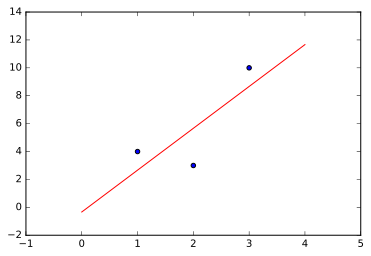

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.clf()
# count the number of values 
X = [1, 2, 3]
Y = [4, 3, 10]
N = len(X)
n = len(Y)

if (N <> n):
    raise RuntimeError, "Arrays X and Y have a different number of elements"

#find XY, XX, SX, SY, SXY and SXX
XY = [0]*N
XX = [0]*N
SX=SY=SXY=SXX=0
for i in range(N):
    XY[i] = X[i]*Y[i]
    XX[i] = X[i]*X[i]
for i in range(N):
    SX = SX + X[i]
    SY = SY + Y[i]
    SXY = SXY + XY[i]
    SXX = SXX + XX[i]

# Calculate the slope and intercept 
Slope = float((N*SXY -(SX*SY)))/(N*SXX-(SX*SX))
         
Intercept = (SY - (Slope*SX)) /float(N)
         
print 'The equation of best line is: y =', Intercept,"+", Slope, "x"
         
# Use the equation to find out the plotting range of x and y
LX = [0]*5
LY = [0]*5
i = 0
for x in range(0,5,1):
        LX[i] = float(x)
        LY[i] = Intercept + Slope * x
        i = i + 1
# Plot the data points and regression equation
plt.plot(LX,LY,"r")
plt.scatter(X, Y)
         

### b
You probably have also seen the following [geometric interpretation](https://en.wikipedia.org/wiki/Ordinary_least_squares#Geometric_approach) of linear regression: 
the design matrix $X$ spans a hyperplane and the best fit is chosen on the plane that minimizes its distance to the data $Y$, which means, $X\hat{\beta}$ (the best fit) is perpendicular to $Y-X\hat{\beta}$. I have plotted out the plane and projection for you, using the three points above: the  <font color='red'>red</font> line segment represents $Y$, the  <font color='green'>green</font> line segment $X\hat{\beta}$ and the  <font color='magenta'>magenta</font> line segment $Y-X\hat{\beta}$; $Y-X\hat{\beta}$ should be perpendicular to $X\hat{\beta}$. 

<img src="linreg3d.svg" alt="Drawing" style="width: 600px;"/>

Now can you numerically verify that the two vectors are indeed perpendicular?

In [3]:
Y_hat=[]
# calucate the corresponding data 
for x in X:
    x_beta= Intercept + Slope * x
    Y_hat.append(x_beta)
Y_hat

e= []
for i in range(3):
    temp = Y[i]-Y_hat[i]
    e.append(temp)
np.dot(Y_hat,e)
#Since the dot product is almost zero, which means the two vectors are perpendicular 


1.7763568394002505e-15

### c

Linear regression is the solution to an optimization problem. For a general optimization problem, one can plot out the **contours** of the objective function to be optimized (like [this one](https://upload.wikimedia.org/wikipedia/commons/thumb/d/da/Newton_optimization_vs_grad_descent.svg/2000px-Newton_optimization_vs_grad_descent.svg.png); in our case, the objective function is the sum-of-squares): it is very helpful in designing algorithms to search for the optima. Can you plot out the contour in the space of $\beta_0$ and $\beta_1$ of our linear regression problem? 

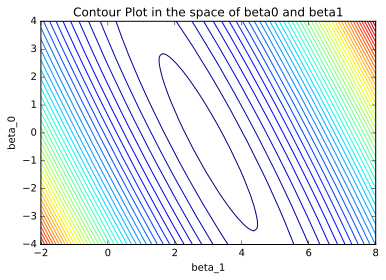

In [4]:
plt.clf()
# set the grid of beta0 and beta1
beta0=np.linspace(-4,4,100)
beta1=np.linspace(-2,8,100)

sse_matrix= np.empty((100,100))

# calculate the value of sum-of-squares for each beta0,beta1 combination 
for m in range(100):
    for n in range(100):
        sse = 0.0
        for k in range(3):
            x_beta = beta0[m] + beta1[n] * X[k]
                    
            temp = (Y[k]-x_beta)**2
            sse = sse + temp
                
        sse_matrix[m,n] = sse 

# plot the contour plot        
plt.contour(beta1,beta0,sse_matrix,50)
plt.xlabel("beta_1")
plt.ylabel("beta_0")
plt.title("Contour Plot in the space of beta0 and beta1")


  



### d
Bonus question (5 pts): Can you make a 3D surface plot of the contour? That is, the graph of sum of squares as a function of $\beta_0$ and $\beta_1$.

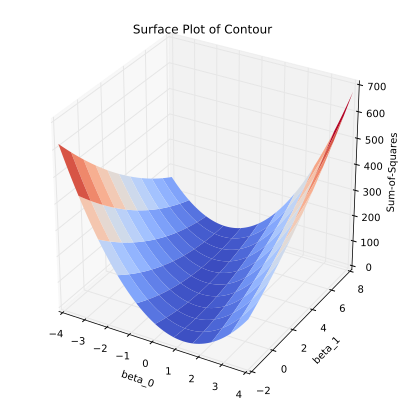

In [9]:
import mpl_toolkits.mplot3d 
from matplotlib import cm
# use the data we got from 1c and use plot_surface to draw the graph of sum of squares as a function of beta0 and beta1
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')

delta = 0.5

beta0_d=np.linspace(-4,4,100)
beta1_d=np.linspace(-2,8,100)

X, Y = np.meshgrid(beta0_d, beta1_d)

Z= sse_matrix

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=0)

plt.title("Surface Plot of Contour")
ax.set_xlabel('beta_0')
ax.set_ylabel('beta_1')
ax.set_zlabel('Sum-of-Squares')


### Appendix: the codes for plotting the plane in 3D

You need to disable the <span style="font-family:Courier;"> %matplotlib inline </span> flag to have a pop-up window of the 3D plot and then rotate it to get the right angle. 

NameError: name 'beta0ss' is not defined

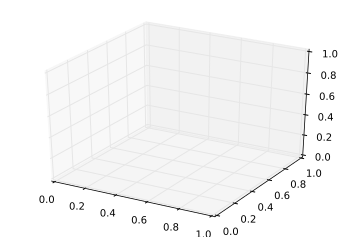

In [6]:
%matplotlib inline 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xyzss = np.array(map(lambda beta: np.array([1,1,1])*beta[0] + x*beta[1], 
                     zip(beta0ss.flatten(), beta1ss.flatten())))
n = len(beta0s)
xss = xyzss[:,0].reshape(n,n)
yss = xyzss[:,1].reshape(n,n)
zss = xyzss[:,2].reshape(n,n)

ax.plot_surface(xss, yss, zss, alpha=0.2, cstride=100, rstride=100)
ax.plot(*zip([0,0,0], y), color='r')
ax.plot(*zip([0,0,0], y_fit), color='g')
ax.plot(*zip(y, y_fit), color='m')

plt.show()
plt.close()

## Q2: Clustering Iris

[K-means clustering](https://en.wikipedia.org/wiki/K-means_clustering) is one of the most popular data mining algorithms and should be in every data scientist's toolbox. In this exercise, we will apply the algorithm to the [classic dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) that goes back to our hero R. A. Fisher. The dataset contains quantitative measurements of some traits of three flower species, and the question is whether we can tell the flower species apart by just analyzing the measurements (that is, without years of training in plant taxonomy). 

### a 
Download and process the data from http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data. 
You can either download the file to your computer and use function <span style="font-family:Courier;">**open**</span>, or [use](http://stackoverflow.com/questions/1393324/in-python-given-a-url-to-a-text-file-what-is-the-simplest-way-to-read-the-cont) Python's built-in module <span style="font-family:Courier;">**urllib2**</span>. 

In [7]:
import urllib2
data = urllib2.urlopen('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')


### b

As the wikipedia page of the dataset explains, the four columns correspond to four **features** of a flower: [sepal](https://en.wikipedia.org/wiki/Sepal) length, sepal width, [petal](https://en.wikipedia.org/wiki/Petal) length and petal width. So one flower is represented by a point in the four-dimensional space. For our purpose of demonstrating the k-means clustering algorithm though, it would be nice if the feature space were two-dimensional, so that we can plot the points on a plane. So we are going to use only *part of* the dataset. 

There is some freedom in reducing a four-dimensional data point to a two-dimensional one: we can use only the sepal data, or only the petal data, among other choices. In fact this choice can be important! Suppose petal is a bad feature for classifying different flower species: they tend to share the same petal length and width. Then keeping petal data in the dataset would likely worsen the performance of the clustering algorithm. You get the idea: we want to use features that are most informative, ie, different between species. 

I could have let you try out a bunch of choices and see which choice of two features is most informative. But for now let's keep the task simple: we want to see how well the choice is using the **sepal area** and **petal area**, defined by *the product of length and width*. 

Task: Apply the k-means clustering algorithm to the dataset using sepal and petal areas. <span style="font-family:Courier;">**Scipy**</span> and <span style="font-family:Courier;">**scikit-learn**</span> have an implementation of the algorithm.

In [8]:
import scipy as sci
import sklearn.cluster as skl
import urllib2

data = urllib2.urlopen('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
# define the array to store data
iris_m=np.empty((150,2))
# data clean 
temp=data.readlines()
iris=[]
for line in temp:
    iris.append(line.split(","))
# extrac data of sepal and petal area
n=len(iris)
all_data=[]

# product sepal part and petal part and store the value in iris_m
for i in range(n):
    try:
        se_product=float(iris[i][0])*float(iris[i][1])
        iris_m[i,0]=se_product
        pe_product=float(iris[i][2])*float(iris[i][3])
        iris_m[i,1]=pe_product
        color=iris[i][4].split('\n')[0]
        S = [se_product,pe_product,color]
        all_data.append(S)
    except ValueError, e:
        print i
# we found that the last line is empty, which result in valueError

#plt.scatter(iris_m[:,0],iris_m[:,1],c="white",marker="o",s=30)

# use the method of sklearn and do the Kmeans clustering based on we data we got above
km = skl.KMeans(n_clusters=3,
                init="random",
                n_init=10,
                max_iter=300,
                tol=1e-4,
                random_state=0)
# store the corresponding prediction label in y_km
y_km=km.fit_predict(iris_m)


150


### c
Plot the results: create two subplots, one with true labels and the other with labels returned by the k-means algorithm; in each subplot, scatter plot the 2-d features with label information *color-coded* (that is, different colors correspond to different labels). I have created an example plot using features of petal length and width below (the stars are the centroids of the clusters). 

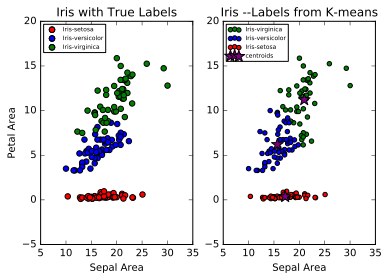

In [9]:

plt.subplot(121)
# plot the original data with labels, make a legend.
for line in all_data:
    if line[2] == "Iris-setosa":
        first=plt.scatter(line[0],line[1],c="red",marker="o",s=30)
    elif line[2] == "Iris-versicolor":
        second=plt.scatter(line[0],line[1],c="blue",marker="o",s=30)
    else:
        thrid=plt.scatter(line[0],line[1],c="green",marker="o",s=30)
plt.legend((first,second,thrid),("Iris-setosa","Iris-versicolor","Iris-virginica"), scatterpoints=1,loc="upper left", fontsize = 6)
plt.title("Iris with True Labels")
plt.xlabel("Sepal Area")
plt.ylabel("Petal Area")
plt.subplot(122)
#plot the data with prediction labels 
plt.scatter(iris_m[y_km==0,0],iris_m[y_km==0,1],c = "green",label="Iris-virginica")
plt.scatter(iris_m[y_km==1,0],iris_m[y_km==1,1],c = "blue",label="Iris-versicolor")
plt.scatter(iris_m[y_km==2,0],iris_m[y_km==2,1],c = "red",label="Iris-setosa")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c="purple",label="centroids",marker="*",s=150)
plt.legend(loc=2,fontsize=6)
plt.title("Iris --Labels from K-means")
plt.xlabel("Sepal Area")


### d 

Run the k-means clustering algorithm again and plot the results. Are they any different from the previous one? Why is that?

'\nWhen we did it again, we find there is slightly difference between the first one and second one.  \nThe results of KMeans clustering depend on the initial state. At first we have to take a initial guess. \nThen the algorithm cluster the dataset based on the initial guess. \nThus, if the initial guess is different, we will have different results.\n\n'

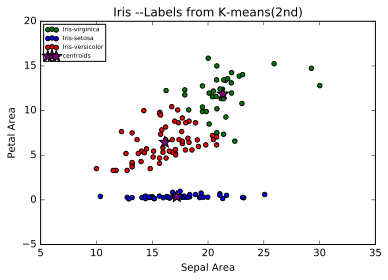

In [10]:
# change the starting seed and do the K mean clustering algorithm again 
km = skl.KMeans(n_clusters=3,
                init="random",
                n_init=10,
                max_iter=300,
                tol=1e-4,
                random_state=1)
y_km=km.fit_predict(iris_m)
#plot the data with prediction labels 
plt.scatter(iris_m[y_km==0,0],iris_m[y_km==0,1],c = "green",label="Iris-virginica")
plt.scatter(iris_m[y_km==1,0],iris_m[y_km==1,1],c = "blue",label="Iris-setosa")
plt.scatter(iris_m[y_km==2,0],iris_m[y_km==2,1],c = "red",label="Iris-versicolor")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c="purple",label="centroids",marker="*",s=150)
plt.legend(loc=2,fontsize=6)
plt.xlabel("Sepal Area")
plt.ylabel("Petal Area")
plt.title("Iris --Labels from K-means(2nd)")
'''
When we did it again, we find there is slightly difference between the first one and second one.  
The results of KMeans clustering depend on the initial state. At first we have to take a initial guess. 
Then the algorithm cluster the dataset based on the initial guess. 
Thus, if the initial guess is different, we will have different results.

'''


## Q3: Mysterious distribution

The Earth's most powerful radio telescope recently [intercepted some signal](https://www.youtube.com/watch?v=yvYU4F-D0dc), apparently from a far-away galaxy and probably from an intelligent civilization. The signal, in numeric form, looks like the following. We ought to make sense of it -- the fate of our whole civilization may depend on it. As statisticians, you are given the following task: **do the numbers follow some distribution**? 

To help you [present your findings](https://www.youtube.com/watch?v=2vz8cG7Awoo), you need to achieve the following data visualization: 
- Plot the histogram of the data
- Try a variety of distributions in [scipy](http://docs.scipy.org/doc/scipy/reference/stats.html) for fitting the data and visualize the fit along with the histogram. 

An example of such a visualization is presented below, using a different set of data from another region of the universe.

- Tip 1: A message just came from the Earth's Defense Council: "Dear Earth-saving Statisticians: Another signal was just intercepted and may or may not help you decipher the previous signal; it reads 'HW3Q2'." 
- Tip 2: You can create as many plots as you want to explore the distributions in scipy.
- Tip 3: To help examine the fit, you can zoom in by setting <span style="font-family:Courier;">**ax.set_xlim**</span> in the figure. 

Finally, conclude which distribution the data likely comes from. 

In [11]:
signal=np.array([ 1.44453212,  1.18258002,  1.03805217,  1.28821731,  1.13498651,
        1.31029573,  1.5952089 ,  1.65411452,  2.04662766,  1.28437529,
        1.13902874,  1.12016579,  1.32608345,  3.22552144,  1.21360913,
        1.21499325,  1.05489324,  1.10231749,  1.84081581,  2.60131908,
        1.07685939,  1.79568456,  1.03640403,  1.17904747,  1.33886448,
        1.16959163,  2.30840447,  3.14355313,  1.0328244 ,  1.0247849 ,
        1.01877994,  1.12818187,  1.11233639,  1.06165922,  1.32419206,
        1.14315296,  1.37209311,  1.0066668 ,  1.06904307,  1.21639181,
        1.54498746,  1.13015779,  1.00990086,  1.48663454,  1.03019391,
        1.07501138,  1.05983836,  1.87301605,  1.27358199,  1.50987017,
        1.79090731,  1.23922153,  1.42016309,  1.56024695,  1.14505021,
        1.41843107,  1.12086361,  1.39185735,  1.03406049,  1.63893923,
        1.84466076,  1.33057553,  1.14603421,  1.04394476,  1.08332697,
        1.08570246,  1.75185286,  1.56981034,  1.01324134,  1.20602076,
        1.93557598,  1.01912749,  1.08129979,  1.02580712,  1.3441864 ,
        2.48311135,  1.00690397,  1.55751516,  1.01597443,  1.07798696,
        1.50190593,  1.09487381,  1.04217224,  1.05702755,  1.06766593,
        1.17280419,  1.04843452,  1.20721447,  1.49912473,  1.21099451,
        1.47325052,  1.15575288,  1.4199131 ,  1.00133827,  1.64895644,
        2.21940257,  2.38249018,  1.2787506 ,  4.11952418,  2.44680645,
        1.11925996,  1.24432807,  1.09014317,  1.04116853,  1.15459539,
        1.32364237,  1.22840459,  1.44669374,  2.14914062,  1.01324296,
        1.40234143,  1.32875911,  1.1903764 ,  1.03822263,  1.04142651,
        1.20502685,  1.37657142,  1.14025011,  1.14132957,  1.05485122,
        2.93439766,  1.12953569,  1.01433269,  1.41002729,  1.02221429,
        1.04507486,  1.89915929,  1.00040325,  1.71601967,  1.03895163,
        1.28666848,  1.31775002,  1.50565365,  1.08036611,  1.08291891,
        1.14346755,  1.62004183,  1.24481398,  1.6159459 ,  1.07471603,
        1.3785449 ,  1.07139888,  1.36404892,  1.1035424 ,  1.18653354,
        1.67940632,  1.44098683,  1.01151223,  1.29900479,  1.50316092,
        1.25431545,  1.300809  ,  1.57419071,  1.16892862,  1.04766515,
        1.46565732,  1.14248455,  1.52089463,  1.12422147,  1.46064678,
        1.15716268,  1.16287548,  1.11840218,  1.01901151,  1.21986849,
        1.22898523,  1.18342923,  1.83057876,  1.65201986,  1.64264932,
        1.49406136,  1.46457628,  1.07788144,  1.62379881,  1.23631498,
        1.03084654,  1.30211605,  1.01585276,  1.0941412 ,  1.24179794,
        1.09338998,  1.35216939,  1.1287503 ,  1.2560944 ,  1.03037496,
        1.01105574,  2.11671164,  1.60810814,  1.22746707,  1.05268564,
        1.27567015,  1.8243831 ,  1.45497029,  1.34461117,  1.25263157,
        1.09969574,  2.28423817,  1.09114628,  1.02924567,  1.33868055,
        1.41425302,  1.02166456,  2.14374467,  1.96345001,  1.01076355,
        1.05519743,  1.16565928,  1.43272015,  1.23355934,  1.28724961,
        1.52779114,  1.76333605,  1.05078056,  1.28866482,  1.4574198 ,
        1.12584717,  1.14428574,  1.2812132 ,  1.01756206,  1.24993151,
        1.22893581,  1.15000807,  2.35666284,  1.00451665,  1.01586006,
        1.03209185,  1.01501507,  1.08105887,  1.0375189 ,  1.18614703,
        1.03165413,  1.00421736,  1.00478351,  5.63202967,  1.26039911,
        1.65651277,  1.27457409,  1.46030544,  1.54235761,  1.02280989,
        2.03485676,  1.24891475,  1.03753238,  1.20053678,  1.03142282,
        1.47056952,  1.10871342,  1.03684134,  1.05495356,  1.47870784,
        1.17867936,  5.46029901,  1.89872266,  1.00779214,  1.06337341,
        2.59135128,  1.1044311 ,  1.16966667,  1.09504863,  1.36072914,
        1.24603878,  1.00690538,  2.37765828,  1.20228452,  1.2998942 ,
        1.18865189,  1.00962163,  1.07820165,  1.1290459 ,  1.64954777,
        1.0293775 ,  1.51887637,  1.0363876 ,  1.13305883,  1.2443947 ,
        1.15394333,  1.09577528,  1.61249966,  1.14713077,  1.07769587,
        1.18475302,  1.02546523,  1.01867818,  1.71465525,  2.97794669,
        1.24209899,  1.08075255,  1.3217345 ,  1.15080532,  1.52862688,
        2.93501019,  2.84750028,  1.06550546,  1.06139283,  1.56688688,
        1.5341392 ,  1.55527989,  2.44856734,  1.46332288,  1.70358137,
        1.42395027,  1.22698314,  1.01357069,  1.10238537,  1.00058879,
        1.22760147,  1.22791248,  1.22229178,  1.43077928,  2.44747457,
        1.34082793,  1.17130741,  1.13065104,  1.07304807,  1.07532599,
        1.53271542,  1.01933396,  1.32101685,  1.32435977,  1.37671972,
        1.01617757,  1.38299598,  1.15703747,  1.33079425,  1.47887067,
        1.12952316,  1.00225794,  1.24101006,  1.21536671,  1.0254581 ,
        1.19639675,  1.10408172,  1.00410173,  1.08807325,  1.15892022,
        1.07955424,  1.0411682 ,  1.03860604,  1.03209221,  1.1350999 ,
        1.17168258,  1.01479641,  1.24795363,  1.16536836,  1.05817675,
        1.27305039,  1.05019362,  1.07853033,  1.03926949,  1.04601681,
        1.0217836 ,  1.52672752,  1.39305883,  1.09628643,  1.12274672,
        1.25571998,  1.12122971,  1.01247142,  1.02155374,  1.11371042,
        2.44719721,  1.1526257 ,  1.27089027,  1.3734149 ,  1.40568478,
        1.2555586 ,  1.02402354,  1.01796652,  1.10552344,  1.08685349,
        1.04662299,  1.01621595,  1.04998689,  1.19854599,  1.18777811,
        1.19984274,  1.22912968,  1.00535462,  1.15231909,  1.04485695,
        1.03309516,  1.54358701,  1.54936218,  1.53813402,  1.0082856 ,
        1.06237822,  1.37362019,  1.01306165,  1.2391745 ,  1.10923518,
        1.51049757,  1.57591102,  1.02022527,  1.31031405,  1.02146551,
        1.03256088,  1.7564268 ,  1.47161263,  1.07307378,  1.209285  ,
        1.18022364,  1.43823141,  1.98235651,  1.11088493,  1.48327823,
        1.27580795,  3.41605249,  1.3891879 ,  1.50648831,  1.55524003,
        1.61109348,  1.63924406,  1.04776302,  2.42919856,  1.90753122,
        1.17293644,  1.33843962,  1.85573092,  1.31772002,  1.10790214,
        1.56594377,  2.00367003,  1.08005327,  1.25465522,  1.08744892,
        1.06633337,  2.52764258,  1.80967039,  2.23305935,  2.26987092,
        1.07410132,  1.39873728,  1.17615383,  1.03103081,  1.00591014,
        1.31333614,  1.96754908,  1.27575065,  1.74059899,  1.11216199,
        1.02686182,  2.66743181,  1.49988162,  1.00286209,  1.39115214,
        1.59426373,  1.76221469,  1.13053833,  1.97958926,  1.26176032,
        1.07059047,  1.02360085,  1.98714012,  1.05543159,  1.24071326,
        1.04875618,  1.95251048,  1.09297224,  1.06678494,  1.15682994,
        1.28572718,  2.00756361,  1.50534382,  1.84392152,  1.00121979,
        1.49484075,  1.05705728,  1.37092179,  1.28509684,  1.09791125,
        1.0669342 ,  1.21611544,  1.27875015,  1.0383276 ,  1.02422354,
        1.01558494,  1.0105134 ,  1.06392521,  2.65297843,  1.21367821,
        1.01339323,  1.9084003 ,  1.14199345,  1.24155876,  1.10717761,
        2.58213476,  1.14104331,  1.12144287,  1.01993451,  1.09259185,
        1.16209374,  1.00242495,  1.01495586,  1.14763459,  1.70935546,
        1.31387709,  1.425331  ,  1.08950402,  1.28232391,  1.05075217,
        1.09509002,  1.21638581,  1.13351737,  1.01140047,  1.12936435,
        1.10520341,  1.01171722,  1.71885653,  1.12952698,  1.048548  ,
        1.00486334,  1.18134442,  1.36394093,  1.0216147 ,  1.12879849,
        1.23911838,  1.10572272,  1.23173362,  1.17937227,  1.71828911,
        1.93676678,  1.58353646,  1.62059538,  1.18831771,  1.17494036,
        1.39089679,  1.23845997,  1.15511487,  1.0404595 ,  1.0614151 ,
        1.43118545,  1.55825178,  1.3249483 ,  1.16293582,  1.22759895,
        1.21863161,  1.18649518,  2.98197871,  1.32669866,  1.50417286,
        1.41295476,  1.00724167,  1.00352313,  1.45902222,  1.09701677,
        1.47815766,  1.47954415,  1.04273363,  1.01096984,  1.13677812,
        1.00177134,  2.82874064,  1.0258243 ,  1.24661972,  1.04191608,
        1.0614147 ,  1.17974741,  1.06213563,  1.05028958,  1.51540798,
        1.14545512,  3.64254994,  1.09910778,  1.50451178,  1.04886102,
        1.60070863,  1.11802302,  2.38421288,  1.67927592,  1.14008191,
        1.27851209,  1.0885582 ,  1.06364424,  1.04414479,  1.10482801,
        1.01560319,  1.1659031 ,  1.32574193,  1.94748268,  1.25285764,
        1.01154308,  1.08793239,  1.04523562,  1.16269232,  1.00706923,
        1.28680385,  1.11265149,  1.32627283,  1.1658267 ,  1.27926552,
        1.00072029,  1.30138494,  1.2729427 ,  1.21741888,  1.63607723,
        1.49140271,  1.20825654,  1.07370304,  1.15169193,  1.00581823,
        1.44156718,  1.72271344,  1.43219064,  1.20513816,  1.05585011,
        1.09346738,  1.46020062,  1.21174856,  1.16524324,  1.14656712,
        1.39961941,  1.18317539,  2.11408944,  1.87092859,  1.62177278,
        1.00382282,  1.29311886,  1.424391  ,  1.19184708,  1.49166116,
        1.04844115,  1.97132441,  1.034448  ,  1.2816377 ,  2.11883346,
        1.16038242,  1.14917275,  1.40651287,  1.1765528 ,  1.57903226,
        1.15755387,  1.44006377,  1.07048106,  1.06635321,  1.00602118,
        1.10234973,  1.41775556,  1.04892445,  1.22248377,  1.33830155,
        1.01172563,  1.4330961 ,  1.0194169 ,  2.10440164,  1.36122223,
        1.3658791 ,  1.01320724,  1.14587868,  1.01980165,  1.31439656,
        1.2530971 ,  1.6657984 ,  1.11830339,  1.1078233 ,  2.25035605,
        1.03461859,  1.08315082,  1.26848889,  1.44457731,  1.00878055,
        1.08992631,  1.19131367,  1.03305638,  1.07423198,  2.41050275,
        1.05112267,  1.02576337,  1.38488803,  1.13964961,  1.15391578,
        1.22827996,  1.45951389,  1.21446323,  1.06678144,  1.26014077,
        1.03614818,  1.10637239,  1.09258428,  1.11960838,  1.35152898,
        1.07040393,  1.05910829,  1.29679733,  1.21231128,  1.15257201,
        1.05512077,  2.17069366,  1.16984553,  1.20956943,  1.20464072,
        1.47027123,  1.00220003,  1.14555249,  2.16051591,  2.95013602,
        2.4575141 ,  1.11025746,  1.39171526,  1.99346342,  1.19997358,
        1.21283806,  1.01368882,  1.14484534,  1.41869765,  1.37537023,
        1.13924088,  1.11022654,  1.06562834,  1.48796921,  1.17623061,
        1.39810622,  1.19301547,  1.05734861,  1.0251517 ,  2.26642566,
        1.14728435,  2.16278657,  1.16221177,  1.0170617 ,  1.14846965,
        1.05618988,  1.22295398,  1.01863807,  1.82228497,  1.16530899,
        1.95035031,  1.37581792,  1.59997181,  1.16871896,  1.20091774,
        1.2345179 ,  1.12573866,  1.94424766,  1.0377868 ,  4.15068131,
        1.54390974,  1.31123082,  1.6089754 ,  1.01553597,  1.00240787,
        1.28047352,  1.23240546,  1.08021956,  1.13483553,  1.31800684,
        1.47926924,  1.04476784,  1.01578032,  1.43035108,  2.27112475,
        1.19636815,  1.57735747,  1.00639764,  1.0231024 ,  1.06562435,
        1.12669513,  1.02623638,  1.06872586,  1.01370443,  1.24875747,
        1.0891727 ,  1.17133224,  1.42452236,  1.05418585,  1.15805445,
        1.50540285,  1.05488569,  1.20700795,  1.3322435 ,  1.00780962,
        1.5048435 ,  1.53888932,  1.31698135,  1.06591709,  1.08570245,
        1.1238637 ,  1.25113308,  1.64502595,  1.42761931,  1.06296594,
        1.30369065,  1.01331162,  1.00362929,  1.06130336,  1.5301247 ,
        1.37532721,  1.10118553,  1.17024091,  1.04202372,  1.13714536,
        1.63944714,  1.1676247 ,  1.35518787,  1.37502073,  1.12400697,
        1.59342054,  4.99415332,  1.37073607,  1.30210462,  2.42457801,
        1.10397704,  1.15337246,  1.07195997,  1.59030075,  1.72792049,
        2.09530775,  1.326607  ,  1.07709749,  1.15990004,  1.68745525,
        1.00635476,  1.40818503,  1.02678228,  1.22877023,  1.1892978 ,
        1.40257272,  1.14394073,  1.07216194,  1.03240683,  1.18567753,
        1.20392303,  1.22116946,  1.41003297,  1.38282255,  1.77681173,
        1.00376977,  1.04547742,  1.15569263,  5.29128002,  1.02524465,
        1.29114942,  1.68235567,  1.21970862,  1.64624387,  2.0412072 ,
        1.2719005 ,  1.10916612,  1.23495698,  1.18049123,  1.22801025,
        1.3098617 ,  1.36333065,  1.90894829,  1.45474912,  1.8144427 ,
        1.32193094,  1.57072353,  1.07505574,  1.00783053,  1.00250381,
        1.01107827,  1.35955945,  1.03737332,  1.09468375,  1.15216324,
        1.70660582,  1.30518619,  4.47329132,  1.07750658,  1.03342563,
        1.38003164,  1.00267156,  1.08618807,  1.42731209,  1.2146333 ,
        1.6351821 ,  2.36810608,  1.80683867,  1.50480417,  1.18301316,
        1.30340664,  1.16995286,  1.06374104,  1.29594315,  1.04074624,
        3.11030369,  1.1642712 ,  1.57406483,  1.36520632,  2.56763039,
        1.20558642,  1.10859618,  2.95074706,  1.22134086,  1.01645654,
        2.10382866,  1.06600503,  1.43707771,  1.29495065,  1.32412538,
        1.17246329,  1.21508987,  1.45700787,  1.2638086 ,  1.44317947,
        1.34051959,  1.0787819 ,  1.06277976,  1.28686286,  1.47100989,
        1.48153744,  1.09805371,  1.28950268,  1.097493  ,  1.12396306,
        2.07002931,  1.02292747,  1.02389288,  1.25194402,  1.08270657,
        1.54513521,  1.03231072,  1.19593147,  1.0254639 ,  1.09026155,
        1.04207303,  1.18328352,  1.54384734,  1.14500442,  1.06594394,
        1.12255889,  1.37353851,  1.17012639,  1.38391157,  1.32727307,
        1.05513737,  1.22336554,  1.22785342,  1.27631816,  1.06380674,
        1.21415415,  3.59724846,  2.11297625,  1.26143227,  1.12505204,
        1.40126187,  1.24665954,  1.0155479 ,  1.28175494,  1.27414843,
        1.54730459,  1.30544803,  1.56983927,  1.28222527,  1.32176709,
        1.08565283,  2.44246581,  1.21030124,  2.80102026,  1.07149333,
        1.09576236,  1.32471874,  1.02038832,  1.25297709,  2.29099447,
        1.3295328 ,  1.00738069,  1.1496182 ,  1.0789617 ,  1.38541987,
        1.00327452,  5.9882054 ,  1.37102479,  1.09900305,  1.25483826,
        2.41822565,  1.40249714,  1.18815789,  1.04979786,  1.00763163,
        1.05815056,  1.00407856,  1.40055227,  1.00692291,  2.3895882 ,
        1.10657036,  1.4949384 ,  1.10496447,  1.09051848,  1.21207706,
        1.01246734,  1.0824369 ,  1.46958707,  1.25495488,  1.26449497,
        1.07475663,  2.15483025,  1.14785043,  1.22485768,  1.10709807,
        1.06421576,  1.18316962,  1.3990104 ,  1.39048945,  1.18194765,
        1.17378432,  1.20407141,  1.00010907,  1.43713945,  1.04910661])

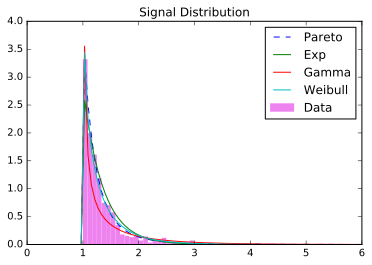

In [16]:
import scipy.stats as sci

# fit the data with different distributions and figure out the corresponding parameters 
par_pareto = sci.pareto.fit(signal)
par_expon = sci.expon.fit(signal)
par_gamma = sci.gamma.fit(signal)
par_weibull = sci.weibull_min.fit(signal) 
# create a grid of x 
x = np.linspace(0,6,100)
# figure out the corresponding pdf 
pdf_fitted_pa = sci.pareto.pdf(x,par_pareto[0],par_pareto[1],par_pareto[2])
pdf_fitted_exp = sci.expon.pdf(x,loc=par_expon[0],scale=par_expon[1])
pdf_fitted_gamma = sci.gamma.pdf(x,par_gamma[0],par_gamma[1],par_gamma[2])
pdf_fitted_weibull = sci.weibull_min.pdf(x,par_weibull[0],par_weibull[1],par_weibull[2])
# plot the histogram 
plt.hist(signal, normed=True, bins = 60, color = "Violet",label="Data" ,stacked=True, fill=True,linewidth=0)

#linestyles = ['-', '--', '-.', ':']
plt.title('Signal Distribution')
plt.plot(x,pdf_fitted_pa,label="Pareto",linestyle='--')
plt.plot(x,pdf_fitted_exp,label="Exp")#,linestyle=linestyles[1])
plt.plot(x,pdf_fitted_gamma,label="Gamma")#,linestyle=linestyles[2])
plt.plot(x,pdf_fitted_weibull,label="Weibull")#,linestyle=linestyles[3])
plt.legend(loc=1)

# It seems that it is more likely that the signal data come from the Pareto distribution which is slightly better than Weibull